In [24]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
house = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [6]:
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [7]:
house.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [8]:
house["Date"] = pd.to_datetime(house["Date"],dayfirst=True)

In [9]:
len(house["Date"].unique())/4

28.0

In [10]:
var = house[house["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = house[house["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = house[house["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

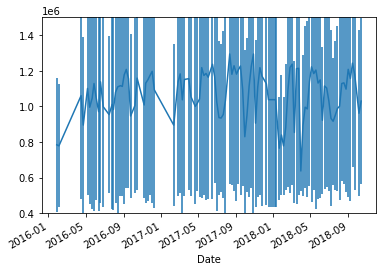

In [11]:
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))

In [12]:
means = house[(house["Type"]=="h") & (house["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").mean()
errors = house[(house["Type"]=="h") & (house["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").std()

In [13]:
means.columns

Index(['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance'], dtype='object')

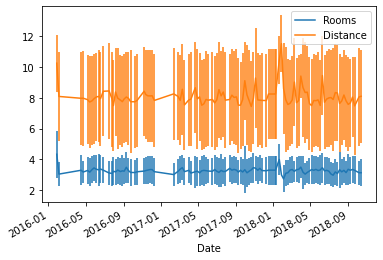

In [17]:
means.drop(["Price", "Postcode",  "Propertycount"],axis=1).plot(yerr=errors)

In [18]:
house[house["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

,Rooms,Price,Postcode,Propertycount,Distance
Date,,,,,
2016-01-28,4.000000,7.842500e+05,3079.200000,11482.733333,17.206667
2016-02-04,3.197368,7.783885e+05,3161.197368,6967.605263,17.859211
2016-04-16,3.414216,1.060234e+06,3118.965686,7576.806373,12.640441
2016-04-23,3.403509,8.948970e+05,3117.324561,7645.100877,13.813158
2016-05-07,3.407563,1.100817e+06,3127.321429,7468.292017,12.457983
...,...,...,...,...,...
2018-09-08,3.382429,1.156374e+06,3124.697674,7913.413437,13.129199
2018-09-15,3.458853,1.243131e+06,3141.511222,7296.391521,13.068828
2018-09-22,3.398406,1.180547e+06,3131.482072,7770.912351,13.450996


In [19]:
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
house[(house["Type"]=="h") & 
          (house["Distance"]<14) &
          (house["Distance"]>13.7) 
          #&(dataframe["Suburb"] =="Northcote")
         ].sort_values("Date", ascending=False).dropna().groupby(["Suburb","SellerG"]).mean()

Rooms   Price  Postcode  Propertycount  Distance
Suburb         SellerG                                                        
Bentleigh East Barry            3.5    1.3M      3.2k          11.0k      13.8
               Beller           3.0  900.0k      3.2k          11.0k      13.8
               Buxton           3.3    1.2M      3.2k          11.0k      13.8
               C21              3.2    1.2M      3.2k          11.0k      13.8
               Eview            5.0    2.1M      3.2k          11.0k      13.8
               First            4.0    1.0M      3.2k          11.0k      13.8
               Fletchers        4.0    1.8M      3.2k          11.0k      13.8
               Gary             3.6    1.2M      3.2k          11.0k      13.8
               Greg             3.0    1.0M      3.2k          11.0k      13.8
               Harcourts        3.0  950.0k      3.2k          11.0k      13.8
               Hodges           3.6    1.2M      3.2k          11.0k      13.8
               Jellis           3.5    1.3M      3.2k          11.0k      13.8
               Marshall         4.0    1.4M      3.2k          11.0k      13.8
               McGrath          3.0    1.1M      3.2k          11.0k      13.8
               Melbourne        4.0    1.1M      3.2k          11.0k      13.8
               Nelson           3.0    1.2M      3.2k          11.0k      13.8
               Nick             3.0    1.0M      3.2k          11.0k      13.8
               Obrien           3.5    1.5M      3.2k          11.0k      13.8
               Paul             3.0    1.6M      3.2k          11.0k      13.8
               Point            2.0    1.2M      3.2k          11.0k      13.8
               Purplebricks     3.0    1.3M      3.2k          11.0k      13.8
               RT               4.0    1.2M      3.2k          11.0k      13.8
               Ray              3.5    1.1M      3.2k          11.0k      13.8
               Thomson          3.0  930.0k      3.2k          11.0k      13.8
               Woodards         3.3    1.2M      3.2k          11.0k      13.8
               buyMyplace       2.5    1.1M      3.2k          11.0k      13.8
               hockingstuart    3.3    1.2M      3.2k          11.0k      13.8
Hampton        Biggin           2.0    1.3M      3.2k           5.5k      13.8
               Buxton           3.3    2.0M      3.2k           5.5k      13.8
               C21              3.5    1.8M      3.2k           5.5k      13.8
               Charlton         3.2    1.8M      3.2k           5.5k      13.8
               Chisholm         2.5    1.3M      3.2k           5.5k      13.8
               David            3.0    1.6M      3.2k           5.5k      13.8
               Follett          4.0    1.8M      3.2k           5.5k      13.8
               G&H              4.0    1.8M      3.2k           5.5k      13.8
               Hodges           3.3    1.7M      3.2k           5.5k      13.8
               Marshall         3.9    2.4M      3.2k           5.5k      13.8
               McGrath          3.0    1.8M      3.2k           5.5k      13.8
               Nick             3.5    1.9M      3.2k           5.5k      13.8
               RT               3.7    2.0M      3.2k           5.5k      13.8
               Ray              3.0    1.0M      3.2k           5.5k      13.8
               Upside           4.0    2.4M      3.2k           5.5k      13.8
               hockingstuart    3.7    1.8M      3.2k           5.5k      13.8
Hampton East   Buxton           3.4    1.3M      3.2k           2.4k      13.8
               Charlton         3.0    1.1M      3.2k           2.4k      13.8
               Chisholm         2.0  793.0k      3.2k           2.4k      13.8
               Hodges           2.9    1.1M      3.2k           2.4k      13.8
               Jellis           3.0    1.1M      3.2k           2.4k      13.8
               Marshall         4.0    1.5M      3.2k           2.4k      13.8
 

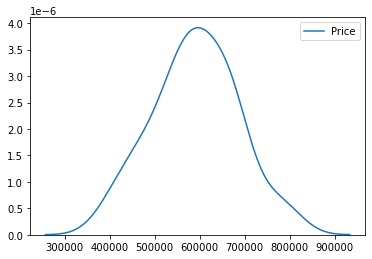

In [22]:
sns.kdeplot(house[(house["Suburb"]=="Northcote")
         & (house["Type"]=="u")
         & (house["Rooms"] == 2)]["Price"])

(0.0, 2000000.0, 0.0, 2.262796944840533e-06)

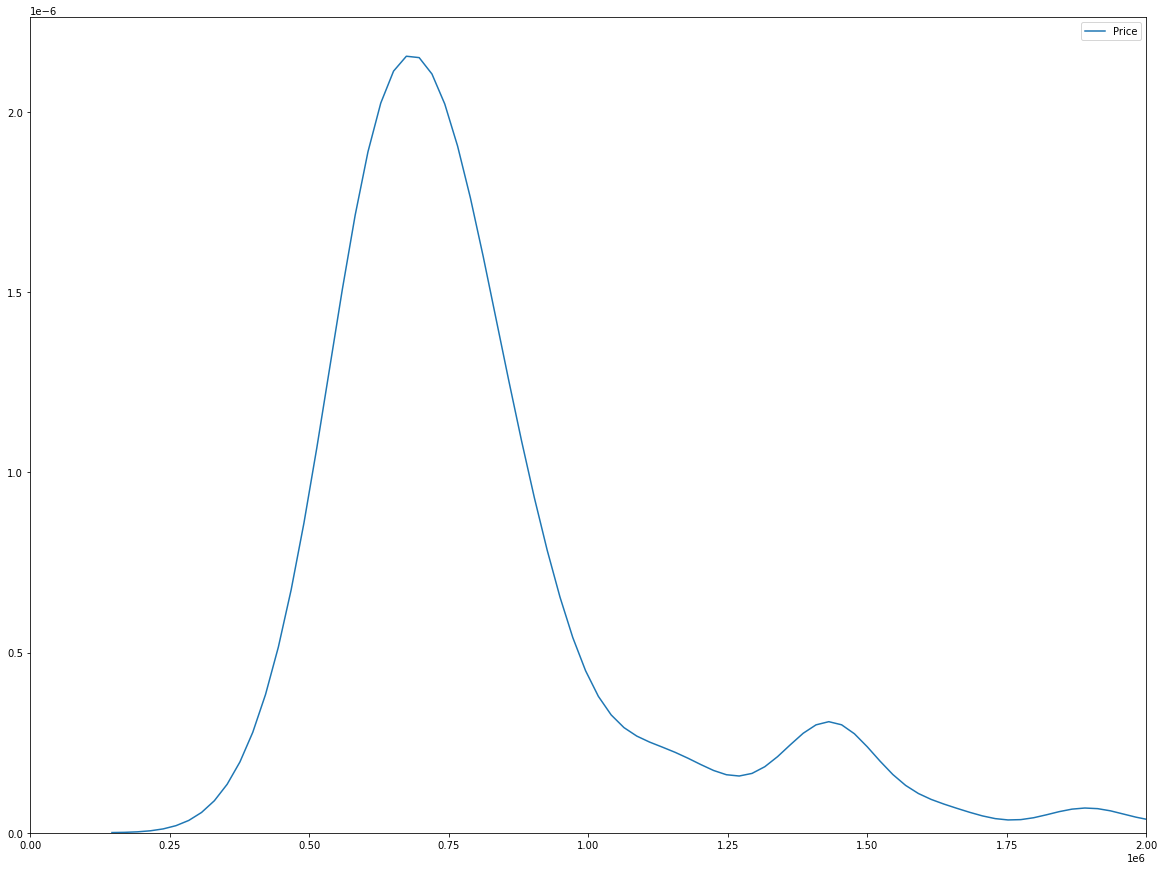

In [25]:
plt.figure(figsize=(20,15))
my_axis = sns.kdeplot(house["Price"][((house["Type"]=="u") &
                                (house["Distance"]>8) &
                                (house["Distance"]<10) &
                                (house["Rooms"] > 2)#&)
                               )])
my_axis.axis(xmin=0, xmax=2000000)

D:\Program\anaconda\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


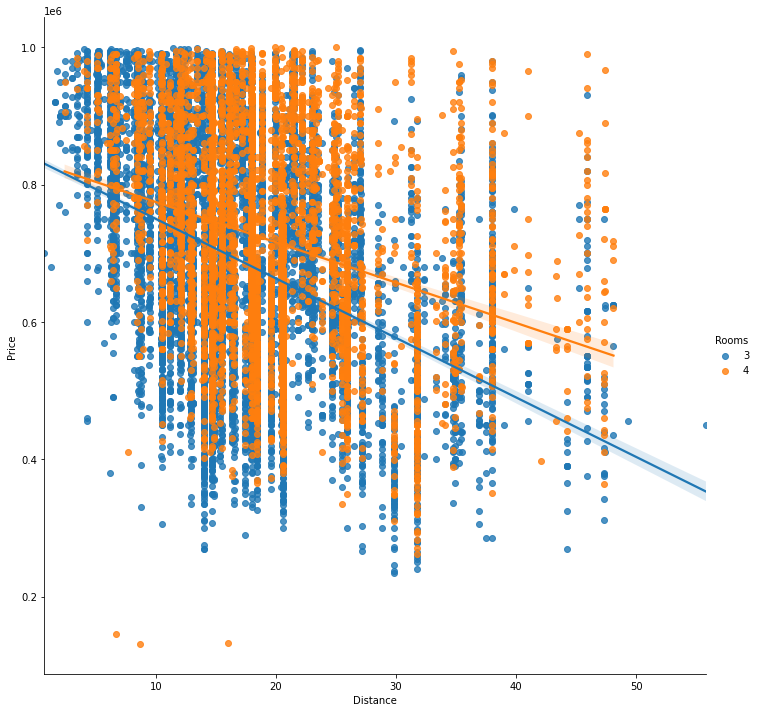

In [26]:
sns.lmplot("Distance","Price",house[(house["Rooms"]<=4) & 
                                         (house["Rooms"]> 2) & 
                                        (house["Type"]=="h") &
                                        (house["Price"]< 1000000)
                                       ].dropna(),hue="Rooms", size=10)

In [27]:
house[(house["Rooms"]>2) & (house["Type"] == "h")& (house["Landsize"] <5000)][["Landsize","Distance"]].dropna().groupby("Distance").mean().plot()

KeyError: 'Landsize'

In [28]:
house.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

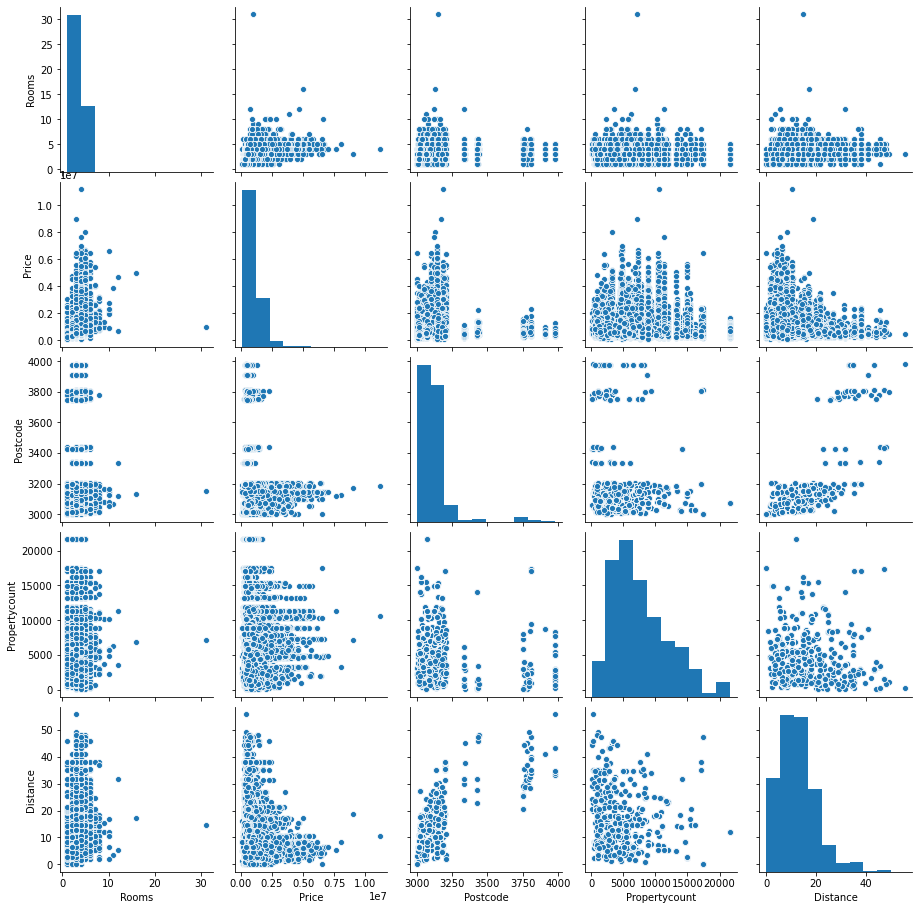

In [29]:
sns.pairplot(house.dropna())

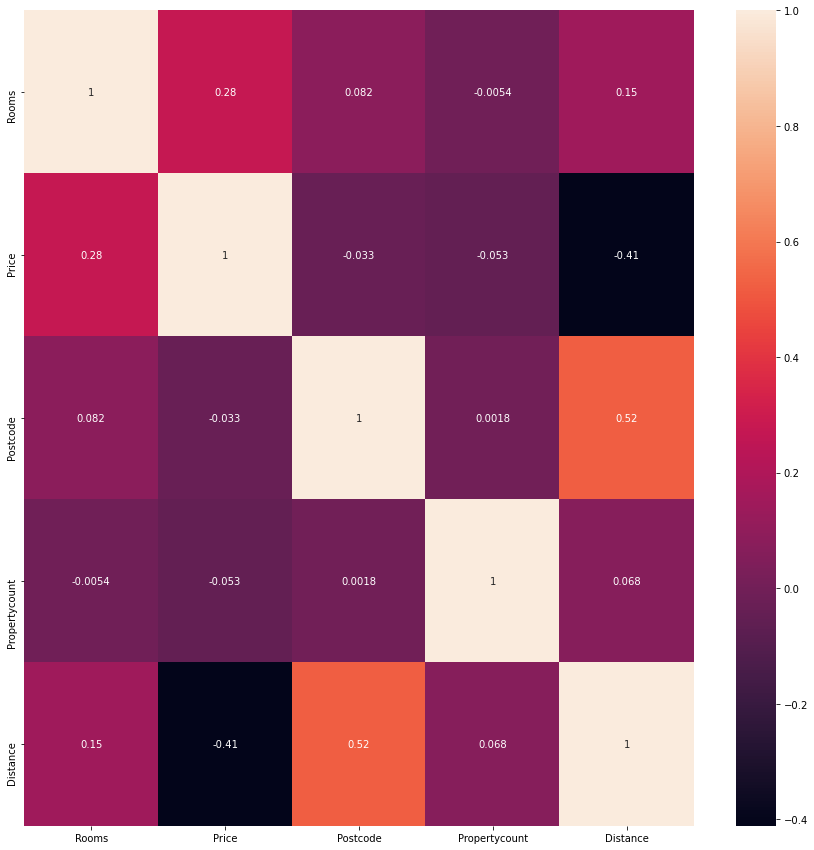

In [30]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(house[house["Type"] == "h"].corr(), annot=True)

2. Apply the model for prediction with holdout and cross
validation

In [39]:
#!pip install scikit-learn
from sklearn.model_selection import train_test_split
from datetime import date

In [40]:
dataframe_dr = house.dropna().sort_values("Date")
all_Data = []

In [41]:
days_since_start = [(x - dataframe_dr["Date"].min()).days for x in dataframe_dr["Date"]]

In [42]:
dataframe_dr["Days"] = days_since_start

In [43]:
suburb_dummies = pd.get_dummies(dataframe_dr[["Type", "Method"]])

In [44]:
all_Data = dataframe_dr.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname"],axis=1).join(suburb_dummies)

In [45]:
y = dataframe_dr["Price"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(all_Data, y, test_size=0.4)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression()

In [49]:
lm.fit(X_train,y_train)

LinearRegression()

In [50]:
print(lm.intercept_)

-2728585.9964311216


In [51]:
all_Data.columns

Index(['Rooms', 'Postcode', 'Propertycount', 'Distance', 'Days', 'Type_h',
       'Type_t', 'Type_u', 'Method_PI', 'Method_S', 'Method_SA', 'Method_SP',
       'Method_VB'],
      dtype='object')

In [52]:
coeff_df = pd.DataFrame(lm.coef_,all_Data.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs

,Coefficient
Rooms,259.5k
Type_h,161.8k
Method_VB,77.9k
Method_PI,6.3k
Method_S,5.2k
Postcode,1.1k
Days,71.0
Propertycount,-3.0
Method_SA,-423.5
Type_t,-1.5k


In [53]:
predictions = lm.predict(X_test)

(200000.0, 1000000.0)

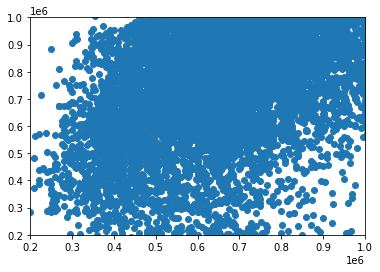

In [54]:
plt.scatter(y_test, predictions)
plt.ylim([200000,1000000])
plt.xlim([200000,1000000])

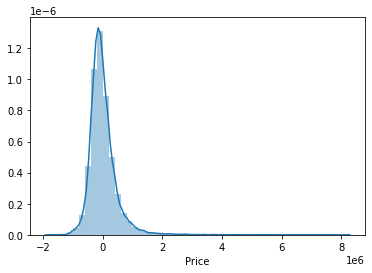

In [55]:
sns.distplot((y_test-predictions),bins=50)

In [56]:
from sklearn import metrics

In [57]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 307950.2950691227
MSE: 210572884941.49277
RMSE: 458882.2124919343
